In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
# Define the stock symbol and date range
symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2021-12-31"

# Fetch the data using Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Keep only the 'Close' prices
data = data['Close'].values.reshape(-1, 1)


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.80)
train_data = data[:train_size]
test_data = data[train_size:]

# Create sequences and labels for training
sequence_length = 60  # Adjust this based on your preference
X_train, y_train, X_test, y_test = [], [], [], []

for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i+sequence_length])
    y_train.append(train_data[i+sequence_length])

for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i+sequence_length])
    y_test.append(test_data[i+sequence_length])

X_train, y_train, X_test, y_test = (
    np.array(X_train),
    np.array(y_train),
    np.array(X_test),
    np.array(y_test)
)


In [4]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
model.fit(X_train, y_train, batch_size=64, epochs=5)


Epoch 1/5
37/37 [==============================] - 15s 140ms/step - loss: 0.0013
Epoch 2/5
37/37 [==============================] - 5s 132ms/step - loss: 5.2516e-05
Epoch 3/5
37/37 [==============================] - 5s 129ms/step - loss: 3.7890e-05
Epoch 4/5
37/37 [==============================] - 5s 129ms/step - loss: 3.8304e-05
Epoch 5/5
37/37 [==============================] - 5s 130ms/step - loss: 3.6972e-05


17/17 [==============================] - 2s 30ms/step


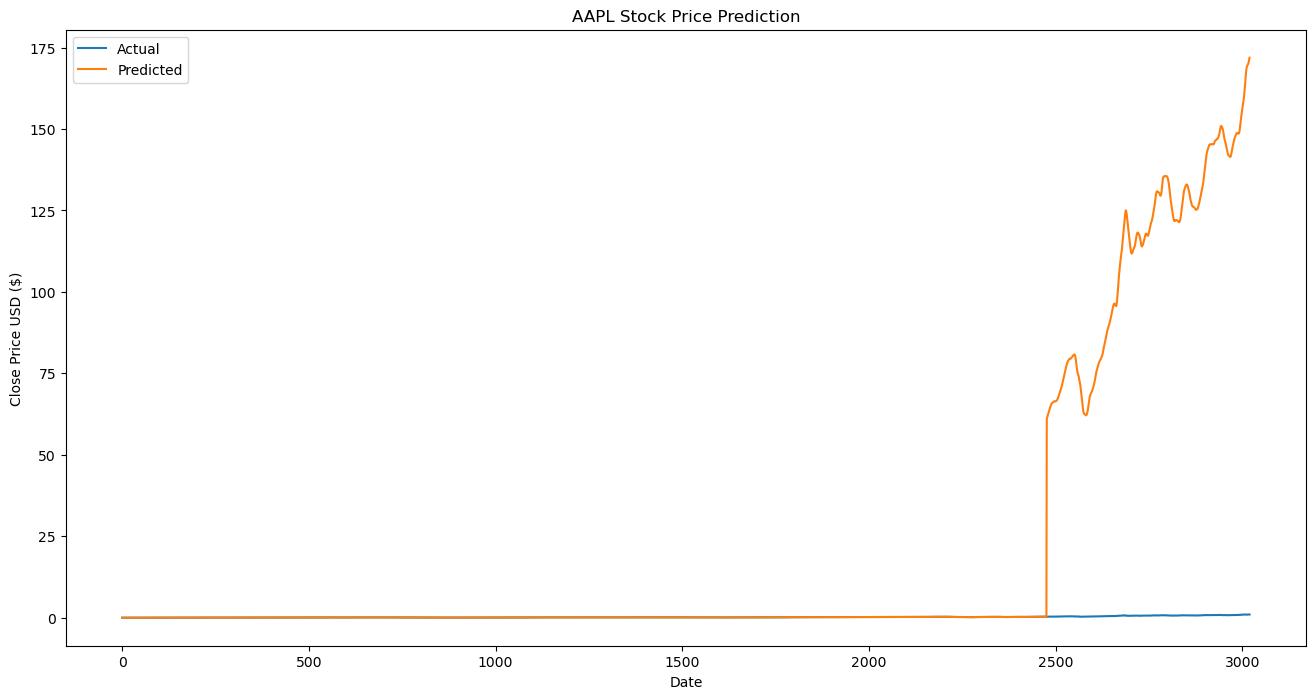

In [7]:
# Get the predicted stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Create a new DataFrame for predictions
predicted_data = data.copy()
predicted_data[train_size + sequence_length:] = predictions

# Plot the actual vs. predicted prices
plt.figure(figsize=(16,8))
plt.title(f"{symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(data, label="Actual")
plt.plot(predicted_data, label="Predicted")
plt.legend()
plt.show()
